# Description

Suggestion from Josh Cook (7/15/21)

The "Regularized Incomplete Beta" function I(x,a,b) tells you the probability that your population mean is <= x given a positive samples and b negative samples
8:53
for example, if you've got 100 samples and 9 are positive, the sample mean is 9%
8:53
but how probable is it that the population mean is 7% or less?



* https://mathworld.wolfram.com/RegularizedBetaFunction.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.betainc.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.beta.html#scipy.special.beta
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html#scipy.special.gamma

\begin{align}
I_x(a, b) &= \frac{\Gamma(a + b)}{\Gamma(a) \Gamma(b)} \int_0^x t^{a - 1}(1 - t)^{b - 1} dt; \quad 0 \le x \le 1 \\
\Gamma(z) &= \int_0^\infty t^{z - 1}e^{-t} dt \\
\Gamma(n + 1) &= n! ; \quad \text{for natural numbers } n\\
B(a, b) &= \text{beta function} \\
  &= \int_0^1 t^{a - 1}(1 - t)^{b - 1} dt \\
  &= \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}
\end{align}



# Imports

In [91]:
%load_ext blackcellmagic


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# $\Gamma$ Function

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html#scipy.special.gamma

\begin{align}
\Gamma(z) &= \int_0^\infty t^{z - 1}e^{-t} dt \\
\Gamma(n + 1) &= n! ; \quad \text{for natural numbers } n\\
\end{align}

In [2]:
from scipy.special import gamma, factorial

In [3]:
gamma([0, 0.5, 1, 5])

array([        inf,  1.77245385,  1.        , 24.        ])

In [4]:
z = 2.5 + 1j

In [5]:
gamma(z)

(0.7747621045510835+0.7076312043795929j)

In [6]:
gamma(z + 1), z * gamma(z)

((1.229274056998117+2.5438401155000685j),
 (1.2292740569981158+2.543840115500066j))

In [7]:
import math
gamma(0.5) ** 2 - math.pi

-4.440892098500626e-16

## Plot gamma(x) for real x

In [8]:
x = np.linspace(-3.5, 5.5, 2251)
y = gamma(x)

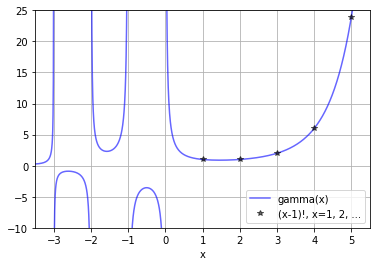

In [9]:
plt.plot(x, y, 'b', alpha=0.6, label='gamma(x)')

k = np.arange(1, 7)
y_fact = factorial(k - 1)
plt.plot(k, y_fact, 'k*', alpha=0.6, label='(x-1)!, x=1, 2, ...')
plt.xlim(-3.5, 5.5)
plt.ylim(-10, 25)
plt.grid()
plt.xlabel('x')
plt.legend(loc='best')

In [10]:
k

array([1, 2, 3, 4, 5, 6])

# Beta function

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.beta.html#scipy.special.beta

\begin{align}
B(a, b) &= \int_0^1 t^{a - 1}(1 - t)^{b - 1} dt \\
  &= \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}
\end{align}

Note:
* this function is symmetric
* $B(1, b) = 1/b$

https://en.wikipedia.org/wiki/Beta_distribution
    
In Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions. The beta distribution is a suitable model for the random behavior of percentages and proportions.


In [11]:
import scipy.special as sc

In [12]:
from scipy.stats import beta

In [23]:
sc.beta(2, 3)

0.08333333333333333

In [25]:
gamma(2) * gamma(3) / gamma(2 + 3)

0.08333333333333333

In [27]:
sc.beta(1, 5)

0.2

## Plot some beta distributions

* https://www.astroml.org/book_figures/chapter3/fig_beta_distribution.html
* https://en.wikipedia.org/wiki/Beta_distribution

Pdf of the beta distribution for $0 \le x \le 1$ and shape parameters $\alpha, \beta \gt 0$

\begin{align}
f(x; \alpha, \beta) &= \frac{1}{B(\alpha, \beta)} x^{\alpha - 1}(1-x)^{\beta - 1} \\
 &= f(1-x; \beta, \alpha)
\end{align}

$B(\alpha, \beta)$ is a normalization constant (total prob = 1).

$x$ is an observed value of a random process $X$

$B(\alpha, \beta) \rightarrow $ Bernoulli distribution when $\alpha, \beta \rightarrow 0$

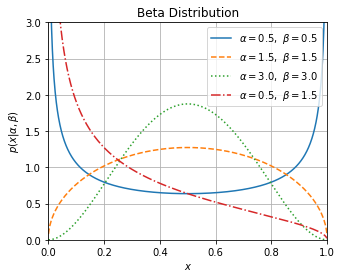

In [234]:
# Define distribution parameters

alpha_values = [0.5, 1.5, 3.0, 0.5]
beta_values = [0.5, 1.5, 3.0, 1.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

fig, ax = plt.subplots(figsize=(5, 4))
for a, b, ls in zip(alpha_values, beta_values, linestyles):
    dist = beta(a, b)
    plt.plot(x, dist.pdf(x), ls=ls, 
#              c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))
    
plt.xlim(0, 1)
plt.ylim(0, 3)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha, \beta)$')
plt.title('Beta Distribution')
plt.grid()
plt.legend()
plt.show()

# Incomplete Beta function

The cumulative distribution function of the beta distribution is the regularized incomplete beta function

https://en.wikipedia.org/wiki/Beta_distribution

\begin{align}
F(x; \alpha, \beta) &= \frac{B_x(\alpha, \beta)}{B(\alpha, \beta)} = I_x(\alpha, \beta) \\
  &= 1 - F(1-x; \beta, \alpha) = 1 - I_{1 - x}(\beta, \alpha)
\end{align}

* https://mathworld.wolfram.com/RegularizedBetaFunction.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.betainc.html
* Gradshteyn & Ryzhik, p950

\begin{align}
B_x(a, b) &= \int_0^x t^{a - 1}(1 - t)^{b - 1} dt; \quad \text{Incomplete beta function. Note the upper limit} \\
B(a, b) &= \int_0^1 t^{a - 1}(1 - t)^{b - 1} dt 
  = \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)} \\
\Gamma(z) &= \int_0^\infty t^{z - 1}e^{-t} dt \\
I_x(a, b) &= \frac{B_x(a, b)}{B(a, b)}; \quad \text{Regularized incomplete beta function} \quad (0 \le x \le 1)\\
    &= \frac{\Gamma(a + b)}{\Gamma(a) \Gamma(b)} \int_0^x t^{a - 1}(1 - t)^{b - 1} dt; \quad 0 \le x \le 1
\end{align}



Note

When $x = 1$

\begin{align}
  B_{x=1}(a, b) &= B(a, b) \\
    I_{x=1}(a, b) &= 1
\end{align}

In [36]:
import scipy.special as sc

In [38]:
# x = 1 -> Bx=1(a, b) = 1
sc.betainc(0.2, 3.5, 1.0)

1.0

In [39]:
sc.betainc(12, 88, [0.07, 0.1])

array([0.04396123, 0.28511234])

In [44]:
sc.betainc(1, 10, [0.01, 0.05, 0.1, 0.15, 0.25, 0.5, 0.75])

array([0.09561792, 0.40126306, 0.65132156, 0.8031256 , 0.94368649,
       0.99902344, 0.99999905])

In [45]:
sc.betainc(10, 10, [0.01, 0.05, 0.1, 0.15, 0.25, 0.5, 0.75])

array([8.50910473e-16, 5.93933906e-09, 3.92988233e-06, 1.43507369e-04,
       8.90327930e-03, 5.00000000e-01, 9.91096721e-01])

## Plot cdf (regularized incomplete beta function)

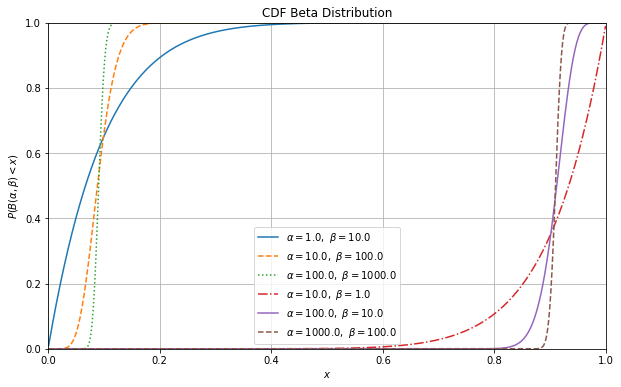

In [197]:
# Define distribution parameters

alpha_values = [1, 10, 100]
beta_values = [10, 100, 1000]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

fig, ax = plt.subplots(figsize=(10, 6))
for a, b, ls in zip(alpha_values + beta_values, beta_values + alpha_values, linestyles + linestyles):
    plt.plot(x, sc.betainc(a, b, x), ls=ls, 
#              c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b)
            )
    
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('$x$')
plt.ylabel(r'$P(B(\alpha, \beta) < x)$')
plt.title('CDF Beta Distribution')
plt.grid()
plt.legend()

In [201]:
sc.betainc(3, 97, 0.09)

0.9948675347954182

In [ ]:
k = np.arange(1, 7)
y_fact = factorial(k - 1)
plt.plot(k, y_fact, 'k*', alpha=0.6, label='(x-1)!, x=1, 2, ...')

In [114]:
# Define distribution parameters

def plot_betainc(alphas, betas, p=None):
    x = np.linspace(0, 1, 1002)[1:-1]
    linestyles = ["solid", "dashed", "dotted", ":", "dashdot"]
    lines = linestyles[:len(alphas)]
    fig, ax = plt.subplots(figsize=(10, 6))
    for a, b, ls in zip(alphas, betas, lines):
        plt.plot(
            x, sc.betainc(a, b, x), ls=ls, label=r"$\alpha=%.1f,\ \beta=%.1f$" % (a, b)
        )
        phat = p if p else a / b
        
        plt.plot(phat, sc.betainc(a, b, phat), "k*", alpha=0.6)

    plt.xlim(0, 0.3)
    plt.ylim(0, 1)
    plt.xlabel("$x$")
    plt.ylabel(r"$P(B(\alpha, \beta) < x)$")
    plt.title("Beta Distribution")
    plt.grid()
    plt.legend()

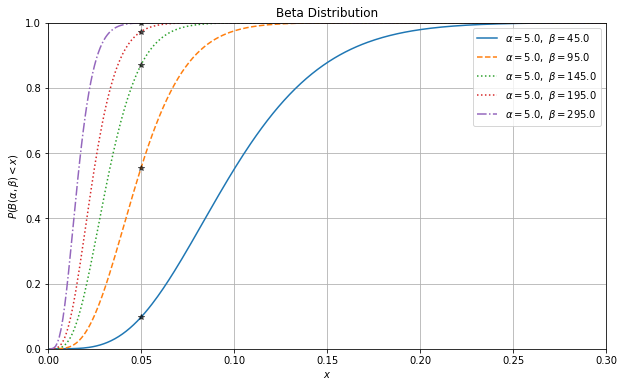

In [118]:
alpha_values = [5, 5, 5, 5, 5, ]
beta_values = [45, 95, 145, 195, 295]

plot_betainc(alpha_values, beta_values, p=0.05)

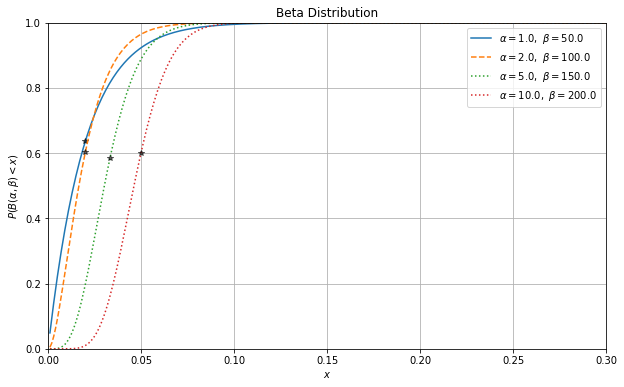

In [112]:
alpha_values = [1, 2, 5, 10, 20]
beta_values = [50, 100, 150, 200]

plot_betainc(alpha_values, beta_values)

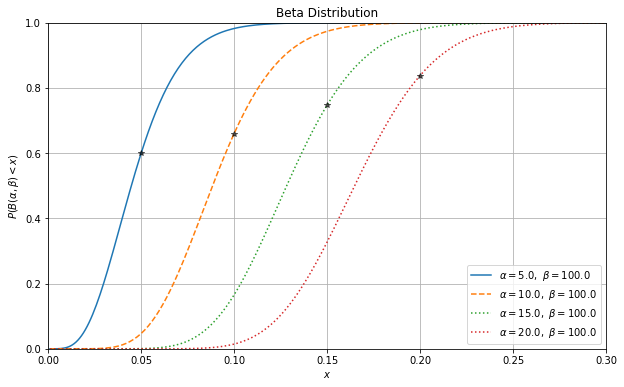

In [113]:
alpha_values = [5, 10, 15, 20, 25]
beta_values = [100, 100, 100, 100]

plot_betainc(alpha_values, beta_values)

In [73]:
sc.betainc(1, 10, 0.1)

0.6513215599

In [74]:
sc.betainc(5, 50, 0.1)

0.6385528602726217

In [75]:
sc.betainc(10, 100, 0.1)

0.6596901506172208

In [76]:
sc.betainc(50, 500, 0.1)

0.776519303109878

In [77]:
sc.betainc(100, 1000, 0.1)

0.8525208237418817

In [78]:
sc.betainc(200, 2000, 0.1)

0.9280185129747222

In [79]:
sc.betainc(300, 3000, 0.1)

0.962580883229439

## Simulate various volumes/block rates

In [194]:
tgt_br = 0.06
pop_br = 0.05


def simulate_rep_tgt(pop_br, tgt_br):
    repairs = [5, 10, 20, 50, 100, 250, 500, 1000, 1500, 2000, 2500, 3000, 3500]

    return (
        pd.DataFrame(data={"repairs": repairs})
        .assign(
            blocks=lambda x: x.apply(lambda r: math.ceil(pop_br * r["repairs"]), axis=1),
            notblocks=lambda x: x['repairs'] - x['blocks'],
            sample_br=lambda x: x['blocks'] / x['repairs']
        )
        .assign(prob_le=lambda r: sc.betainc(r["blocks"], r["notblocks"], pop_br))
        .assign(prob_gt=lambda x: 1 - x["prob_le"])
        .assign(tgt_br=tgt_br)
        .assign(prob_le_tgt=lambda r: sc.betainc(r["blocks"], r["notblocks"], tgt_br))
        .assign(prob_gt_tgt=lambda x: 1 - x["prob_le_tgt"])
    )

,repairs,blocks,notblocks,sample_br,prob_le,prob_gt,tgt_br,prob_le_tgt,prob_gt_tgt
0,5,1,4,0.200,0.590,0.410,0.050,0.185,0.815
1,10,2,8,0.200,0.564,0.436,0.050,0.071,0.929
2,20,4,16,0.200,0.545,0.455,0.050,0.013,0.987
3,50,10,40,0.200,0.528,0.472,0.050,0.000,1.000
4,100,20,80,0.200,0.520,0.480,0.050,0.000,1.000
5,250,50,200,0.200,0.513,0.487,0.050,0.000,1.000
6,500,100,400,0.200,0.509,0.491,0.050,0.000,1.000
7,1000,200,800,0.200,0.506,0.494,0.050,0.000,1.000
8,1500,300,1200,0.200,0.505,0.495,0.050,0.000,1.000
9,2000,400,1600,0.200,0.504,0.496,0.050,0.000,1.000


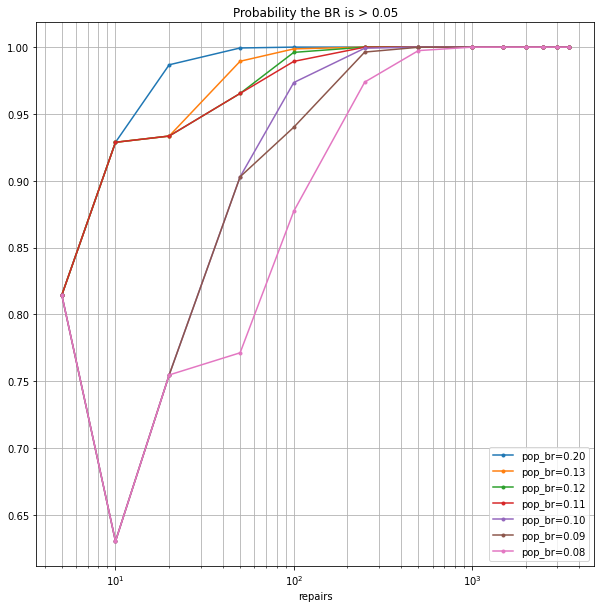

In [226]:
tgt_br = 0.05

tmp = simulate_rep_tgt(pop_br=0.20, tgt_br=tgt_br)
display(tmp)

fig, ax = plt.subplots(figsize=(10, 10))
simulate_rep_tgt(pop_br=0.17, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.20')

simulate_rep_tgt(pop_br=0.13, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.13')
simulate_rep_tgt(pop_br=0.12, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.12')
simulate_rep_tgt(pop_br=0.11, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.11')
simulate_rep_tgt(pop_br=0.10, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.10')
simulate_rep_tgt(pop_br=0.09, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.09')
simulate_rep_tgt(pop_br=0.08, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.08')

# simulate_rep_tgt(pop_br=0.49, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.13')
# simulate_rep_tgt(pop_br=0.31, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.12')
# simulate_rep_tgt(pop_br=0.29, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.11')
# simulate_rep_tgt(pop_br=0.27, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.10')
# simulate_rep_tgt(pop_br=0.25, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.09')
# simulate_rep_tgt(pop_br=0.23, tgt_br=tgt_br).plot('repairs', 'prob_gt_tgt', ax=ax, style='.-', label='pop_br=0.08')


ax.set_xscale('log')
plt.grid(which='both')
ax.set_title(f"Probability the BR is > {tgt_br}")
plt.show()

# Scipy stats

In [84]:
from scipy import stats

In [85]:
print(stats.beta.__doc__)

A beta continuous random variable.

    As an instance of the `rv_continuous` class, `beta` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(a, b, loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, a, b, loc=0, scale=1)
        Probability density function.
    logpdf(x, a, b, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, a, b, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, a, b, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, a, b, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(x, a, b, loc=0, scale=1)
        Log of the survival function.
    ppf(q, a, b, loc=0, scale=1)
        Percent point function (inverse of ``cdf`` --- percentiles).
    i

In [86]:
dist = stats.beta(50, 500)

Calculate regularized incomplete beta function using cdf of a beta distribution and `stats.beta`

In [87]:
dist.cdf(0.1)

0.776519303109878

Calculate using the `scipy.special.betainc` function

In [88]:
sc.betainc(50, 500, 0.1)

0.776519303109878